In [1]:
import pickle
import os
from copy import copy

import pandas as pd
import numpy as np
from astropy.table import Table
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn
from sklearn.neighbors import KDTree

In [2]:
data_dir = 'data'
FLOAT_PREC = 8
with open(f'{data_dir}/features_sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711.pkl', 'rb') as f:
    features_list = pickle.load(f)

In [3]:
t = Table.read(f'{data_dir}/DR16Q_Superset_v3.fits')
print(t.colnames)
dr16q_superset = t[['THING_ID', 'SDSS_NAME', 'RA', 'DEC', 'Z', 'CLASS_PERSON', 'AUTOCLASS_PQN', 'AUTOCLASS_DR14Q']].to_pandas()
dr16q_superset.drop_duplicates(subset=['THING_ID'], inplace=True, keep='last')
dr16q_superset['RA'] = np.around(dr16q_superset['RA'], FLOAT_PREC)
dr16q_superset['DEC'] = np.around(dr16q_superset['DEC'], FLOAT_PREC)

['SDSS_NAME', 'RA', 'DEC', 'PLATE', 'MJD', 'FIBERID', 'AUTOCLASS_PQN', 'AUTOCLASS_DR14Q', 'IS_QSO_QN', 'Z_QN', 'RANDOM_SELECT', 'Z_10K', 'Z_CONF_10K', 'PIPE_CORR_10K', 'IS_QSO_10K', 'PRIM_REC', 'THING_ID', 'Z_VI', 'Z_CONF', 'CLASS_PERSON', 'Z_DR12Q', 'IS_QSO_DR12Q', 'Z_DR7Q_SCH', 'IS_QSO_DR7Q', 'Z_DR6Q_HW', 'Z_DR7Q_HW', 'IS_QSO_FINAL', 'Z', 'SOURCE_Z', 'Z_PIPE', 'ZWARNING', 'OBJID', 'Z_PCA', 'ZWARN_PCA', 'DELTACHI2_PCA', 'Z_HALPHA', 'ZWARN_HALPHA', 'DELTACHI2_HALPHA', 'Z_HBETA', 'ZWARN_HBETA', 'DELTACHI2_HBETA', 'Z_MGII', 'ZWARN_MGII', 'DELTACHI2_MGII', 'Z_CIII', 'ZWARN_CIII', 'DELTACHI2_CIII', 'Z_CIV', 'ZWARN_CIV', 'DELTACHI2_CIV', 'Z_LYA', 'ZWARN_LYA', 'DELTACHI2_LYA', 'Z_DLA', 'NHI_DLA', 'CONF_DLA', 'BAL_PROB', 'BI_CIV', 'ERR_BI_CIV', 'AI_CIV', 'ERR_AI_CIV', 'BI_SIIV', 'ERR_BI_SIIV', 'AI_SIIV', 'ERR_AI_SIIV', 'BOSS_TARGET1', 'EBOSS_TARGET0', 'EBOSS_TARGET1', 'EBOSS_TARGET2', 'ANCILLARY_TARGET1', 'ANCILLARY_TARGET2', 'NSPEC_SDSS', 'NSPEC_BOSS', 'NSPEC', 'PLATE_DUPLICATE', 'MJD_DUPLIC

In [4]:
dr16q_superset

,THING_ID,SDSS_NAME,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q
1,171139738,b'000000.04+064602.3',0.000187,6.767321,-0.000685,0,b'STAR',b'STAR'
2,349500180,b'000000.05+272811.6',0.000215,27.469903,-0.000839,0,b'STAR',b'STAR'
3,60588214,b'000000.06-021415.2',0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR'
4,405570842,b'000000.15+353104.2',0.000629,35.517841,0.845435,0,b'QSO',b'QSO'
5,357140356,b'000000.18+282535.8',0.000763,28.426617,-0.000611,1,b'STAR',b'STAR'
...,...,...,...,...,...,...,...,...
1440609,351857938,b'235959.80+274621.3',359.999190,27.772593,-0.000328,1,b'STAR',b'STAR'
1440610,401165277,b'235959.83+344315.0',359.999303,34.720842,3.109000,3,b'QSO',b'QSO'
1440612,139887781,b'235959.90+031606.9',359.999615,3.268586,1.232962,0,b'QSO',b'QSO'
1440613,292309197,b'235959.94+204315.8',359.999759,20.721079,2.009865,0,b'QSO',b'QSO'


In [5]:
t = Table.read(f'{data_dir}/23_DR16Q_v4.fits')
print(t.colnames)
dr16q = t[['THING_ID', 'SDSS_NAME', 'RA', 'DEC', 'Z', 'CLASS_PERSON', 'AUTOCLASS_PQN', 'AUTOCLASS_DR14Q']].to_pandas()
dr16q.drop_duplicates(subset=['THING_ID'], inplace=True, keep='last')
dr16q['RA'] = np.around(dr16q['RA'], FLOAT_PREC)
dr16q['DEC'] = np.around(dr16q['DEC'], FLOAT_PREC)

['SDSS_NAME', 'RA', 'DEC', 'PLATE', 'MJD', 'FIBERID', 'AUTOCLASS_PQN', 'AUTOCLASS_DR14Q', 'IS_QSO_QN', 'Z_QN', 'RANDOM_SELECT', 'Z_10K', 'Z_CONF_10K', 'PIPE_CORR_10K', 'IS_QSO_10K', 'THING_ID', 'Z_VI', 'Z_CONF', 'CLASS_PERSON', 'Z_DR12Q', 'IS_QSO_DR12Q', 'Z_DR7Q_SCH', 'IS_QSO_DR7Q', 'Z_DR6Q_HW', 'Z_DR7Q_HW', 'IS_QSO_FINAL', 'Z', 'SOURCE_Z', 'Z_PIPE', 'ZWARNING', 'OBJID', 'Z_PCA', 'ZWARN_PCA', 'DELTACHI2_PCA', 'Z_HALPHA', 'ZWARN_HALPHA', 'DELTACHI2_HALPHA', 'Z_HBETA', 'ZWARN_HBETA', 'DELTACHI2_HBETA', 'Z_MGII', 'ZWARN_MGII', 'DELTACHI2_MGII', 'Z_CIII', 'ZWARN_CIII', 'DELTACHI2_CIII', 'Z_CIV', 'ZWARN_CIV', 'DELTACHI2_CIV', 'Z_LYA', 'ZWARN_LYA', 'DELTACHI2_LYA', 'Z_LYAWG', 'Z_DLA', 'NHI_DLA', 'CONF_DLA', 'BAL_PROB', 'BI_CIV', 'ERR_BI_CIV', 'AI_CIV', 'ERR_AI_CIV', 'BI_SIIV', 'ERR_BI_SIIV', 'AI_SIIV', 'ERR_AI_SIIV', 'BOSS_TARGET1', 'EBOSS_TARGET0', 'EBOSS_TARGET1', 'EBOSS_TARGET2', 'ANCILLARY_TARGET1', 'ANCILLARY_TARGET2', 'NSPEC_SDSS', 'NSPEC_BOSS', 'NSPEC', 'PLATE_DUPLICATE', 'MJD_DUPLICA

In [6]:
dr16q

,THING_ID,SDSS_NAME,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q
0,405570842,b'000000.15+353104.2',0.000629,35.517841,0.845435,0,b'QSO',b'QSO'
1,376953805,b'000000.33+310325.3',0.001415,31.057048,2.035491,0,b'QSO',b'QSO'
2,175096522,b'000000.36+070350.8',0.001535,7.064129,1.574227,0,b'QSO',b'QSO'
3,351857966,b'000000.36+274356.2',0.001526,27.732283,1.770552,0,b'QSO',b'QSO'
4,196571343,b'000000.45+092308.2',0.001914,9.385637,2.024146,0,b'QSO',b'QSO'
...,...,...,...,...,...,...,...,...
750409,360831416,b'235959.78+285717.0',359.999118,28.954734,2.452000,3,b'QSO',b'QSO'
750410,401165277,b'235959.83+344315.0',359.999303,34.720842,3.109000,3,b'QSO',b'QSO'
750411,139887781,b'235959.90+031606.9',359.999615,3.268586,1.232962,0,b'QSO',b'QSO'
750412,292309197,b'235959.94+204315.8',359.999759,20.721079,2.009865,0,b'QSO',b'QSO'


In [7]:
(dr16q['AUTOCLASS_PQN'] == b'QSO').sum()

653353

In [8]:
full_01 = dr16q_superset.merge(dr16q, how='left', on=['THING_ID'])
full_01 = full_01[['THING_ID', 'RA_x', 'DEC_x', 'Z_x', 'CLASS_PERSON_x', 'AUTOCLASS_PQN_x', 'AUTOCLASS_DR14Q_x', 'RA_y']]
full_01['RA_y'] = ~full_01['RA_y'].isna()
full_01.columns = ['SDSS_ID', 'RA', 'DEC', 'Z', 'CLASS_PERSON', 'AUTOCLASS_PQN', 'AUTOCLASS_DR14Q', 'DR16Q']
full_01

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q
0,171139738,0.000187,6.767321,-0.000685,0,b'STAR',b'STAR',False
1,349500180,0.000215,27.469903,-0.000839,0,b'STAR',b'STAR',False
2,60588214,0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR',False
3,405570842,0.000629,35.517841,0.845435,0,b'QSO',b'QSO',True
4,357140356,0.000763,28.426617,-0.000611,1,b'STAR',b'STAR',False
...,...,...,...,...,...,...,...,...
1227531,351857938,359.999190,27.772593,-0.000328,1,b'STAR',b'STAR',False
1227532,401165277,359.999303,34.720842,3.109000,3,b'QSO',b'QSO',True
1227533,139887781,359.999615,3.268586,1.232962,0,b'QSO',b'QSO',True
1227534,292309197,359.999759,20.721079,2.009865,0,b'QSO',b'QSO',True


In [9]:
t = Table.read(f'{data_dir}/DR14Q_v4_4.fits')
print(t.colnames)
dr14q = t[['THING_ID', 'SDSS_NAME', 'RA', 'DEC', 'Z']].to_pandas()
dr14q.drop_duplicates(subset=['THING_ID'], inplace=True, keep='last')
dr14q['RA'] = np.around(dr14q['RA'], FLOAT_PREC)
dr14q['DEC'] = np.around(dr14q['DEC'], FLOAT_PREC)
dr14q.columns = ['SDSS_ID', 'SDSS_NAME', 'RA', 'DEC', 'Z']

['SDSS_NAME', 'RA', 'DEC', 'THING_ID', 'PLATE', 'MJD', 'FIBERID', 'SPECTRO', 'Z', 'Z_ERR', 'SOURCE_Z', 'Z_VI', 'Z_PIPE', 'Z_PIPE_ERR', 'ZWARNING', 'Z_PCA', 'Z_PCA_ER', 'Z_MGII', 'BOSS_TARGET1', 'ANCILLARY_TARGET1', 'ANCILLARY_TARGET2', 'EBOSS_TARGET0', 'EBOSS_TARGET1', 'EBOSS_TARGET2', 'N_SPEC_SDSS', 'N_SPEC_BOSS', 'N_SPEC', 'PLATE_DUPLICATE', 'MJD_DUPLICATE', 'FIBERID_DUPLICATE', 'SPECTRO_DUPLICATE', 'BI_CIV', 'ERR_BI_CIV', 'RUN_NUMBER', 'RERUN_NUMBER', 'COL_NUMBER', 'FIELD_NUMBER', 'OBJ_ID', 'PSFFLUX', 'IVAR_PSFFLUX', 'PSFMAG', 'ERR_PSFMAG', 'MI', 'GAL_EXT', 'RASS_COUNTS', 'RASS_COUNTS_SNR', 'SDSS2ROSAT_SEP', 'FLUX_0.2_2.0keV', 'FLUX_0.2_2.0keV_ERR', 'FLUX_2.0_12.0keV', 'FLUX_2.0_12.0keV_ERR', 'FLUX_0.2_12.0keV', 'FLUX_0.2_12.0keV_ERR', 'LUM_0.2_12.0keV', 'SDSS2XMM_SEP', 'GALEX_MATCHED', 'FUV', 'FUV_IVAR', 'NUV', 'NUV_IVAR', 'JMAG', 'ERR_JMAG', 'JSNR', 'JRDFLAG', 'HMAG', 'ERR_HMAG', 'HSNR', 'HRDFLAG', 'KMAG', 'ERR_KMAG', 'KSNR', 'KRDFLAG', 'SDSS2MASS_SEP', 'W1MAG', 'ERR_W1MAG', 'W1SN

In [10]:
dr14q

,SDSS_ID,SDSS_NAME,RA,DEC,Z
0,268270422,b'000000.45+174625.4',0.001898,17.773739,2.309000
1,163544156,b'000000.57+055630.8',0.002375,5.941903,2.103120
2,244864389,b'000000.66+145828.8',0.002756,14.974675,2.497000
3,154078229,b'000000.97+044947.2',0.004052,4.829781,1.619000
4,319918739,b'000001.20+240354.5',0.005026,24.065163,1.616210
...,...,...,...,...,...
526351,360831416,b'235959.78+285717.0',359.999118,28.954734,2.452000
526352,401165277,b'235959.83+344315.0',359.999303,34.720842,3.109000
526353,139887781,b'235959.90+031606.9',359.999615,3.268586,1.233161
526354,292309197,b'235959.94+204315.8',359.999759,20.721079,2.009941


In [11]:
full = full_01.merge(dr14q, how='left', on=['SDSS_ID'])
full = full[['SDSS_ID', 'RA_x', 'DEC_x', 'Z_x', 'CLASS_PERSON', 'AUTOCLASS_PQN', 'AUTOCLASS_DR14Q', 'DR16Q', 'SDSS_NAME']]
full['SDSS_NAME'] = ~full['SDSS_NAME'].isna()
full.columns = ['SDSS_ID', 'RA', 'DEC', 'Z', 'CLASS_PERSON', 'AUTOCLASS_PQN', 'AUTOCLASS_DR14Q', 'DR16Q', 'DR14Q']

In [12]:
full

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q
0,171139738,0.000187,6.767321,-0.000685,0,b'STAR',b'STAR',False,False
1,349500180,0.000215,27.469903,-0.000839,0,b'STAR',b'STAR',False,False
2,60588214,0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR',False,False
3,405570842,0.000629,35.517841,0.845435,0,b'QSO',b'QSO',True,False
4,357140356,0.000763,28.426617,-0.000611,1,b'STAR',b'STAR',False,False
...,...,...,...,...,...,...,...,...,...
1227531,351857938,359.999190,27.772593,-0.000328,1,b'STAR',b'STAR',False,False
1227532,401165277,359.999303,34.720842,3.109000,3,b'QSO',b'QSO',True,True
1227533,139887781,359.999615,3.268586,1.232962,0,b'QSO',b'QSO',True,True
1227534,292309197,359.999759,20.721079,2.009865,0,b'QSO',b'QSO',True,True


In [13]:
dfs = []
for i in range(32):
    num = str(i).zfill(5)
    feas = pd.read_pickle(
        f'{data_dir}/22_DR16Q_v4-wo_20_train/part-{num}.features.gz_pkl',
        compression='gzip'
    )[['RA', 'DEC'] + features_list]
    preds = pd.read_pickle(
        f'{data_dir}/22_DR16Q_v4-wo_20_train/part-{num}.predictions.x1a.gz_pkl',
        compression='gzip'
    )[['zoo_x1a35_z_max', 'zoo_x1a35_z_maxConf']]
    df = feas.merge(preds, how='right', left_index=True, right_index=True)
    dfs.append(df)
DR16Q_22_v4 = pd.concat(dfs, axis=0)
DR16Q_22_v4['SOURCE'] = ['DR16Q_22_v4'] * DR16Q_22_v4.shape[0]
DR16Q_22_v4.drop_duplicates(subset=['RA', 'DEC'], inplace=True, keep='last')
DR16Q_22_v4.reset_index(inplace=True, drop=True)
DR16Q_22_v4

,RA,DEC,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,sdssdr16_u-g_psf,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,0.001415,31.057048,22.074640,21.787479,21.562507,21.360414,20.933499,21.817585,21.363539,0.287161,...,21.058581,0.305267,0.779212,0.473944,-0.023963,-0.116084,-0.320602,2.028873,0.274436,DR16Q_22_v4
1,0.001535,7.064129,22.498194,22.103252,21.854685,21.638759,21.964469,21.761538,21.574824,0.394942,...,21.778303,0.151087,0.315885,0.164798,-0.043265,-0.070024,-0.605396,1.613,0.561226,DR16Q_22_v4
2,0.001526,27.732283,22.330387,21.903107,21.751831,21.664443,22.048195,21.924103,21.556177,0.427280,...,21.972976,0.142241,0.327176,0.184935,-0.458877,-0.524986,-2.353988,1.682694,0.613794,DR16Q_22_v4
3,0.001914,9.385637,18.765830,18.661867,18.499508,18.335921,18.158410,18.774551,18.369465,0.103963,...,18.119927,0.230702,0.535612,0.304910,-0.049329,0.083550,0.047153,NaN,NaN,DR16Q_22_v4
4,0.001978,-0.451088,21.672738,21.193839,20.508787,20.153170,19.878580,21.432634,19.721854,0.478899,...,19.557413,0.818934,1.409359,0.590424,0.096018,0.009057,-0.250328,0.3508,0.702891,DR16Q_22_v4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306735,359.997573,-9.826069,22.488502,21.007420,21.059175,21.065099,20.417605,19.705819,21.006593,1.481082,...,20.867049,-0.140864,0.479309,0.620173,-0.419798,-0.469388,-0.363081,2.522,0.733557,DR16Q_22_v4
306736,359.997675,0.144870,20.452710,20.535363,20.305790,20.287443,20.298002,20.508662,20.289982,-0.082653,...,20.579187,0.388294,0.286701,-0.101593,-0.366830,-0.191817,-0.268319,1.175745,0.7415,DR16Q_22_v4
306737,359.997704,10.564075,20.054219,19.806360,19.387776,19.168335,19.006462,19.925669,19.138338,0.247859,...,18.921942,0.406352,0.644444,0.238092,0.239241,0.162244,0.082854,1.451017,0.844344,DR16Q_22_v4
306738,359.998520,-0.655884,22.055338,22.506995,21.409914,21.748930,21.661750,21.947964,21.504402,-0.451657,...,21.326957,0.590700,0.871405,0.280705,0.235645,0.314801,-0.326978,1.078204,0.492389,DR16Q_22_v4


In [14]:
dfs = []

feas = pd.read_pickle(
    f'{data_dir}/20_2-fold-cv/cv2_0/part-00000.features.gz_pkl',
    compression='gzip'
)[['ra', 'dec'] + features_list]
preds = pd.read_pickle(
    f'{data_dir}/20_2-fold-cv/cv2_0/part-00000.predictions.x1cv2_0.gz_pkl',
    compression='gzip'
)[['zoo_x1cv2_035_z_max', 'zoo_x1cv2_035_z_maxConf']]
df = feas.merge(preds, how='right', left_index=True, right_index=True)
df['SOURCE'] = ['train_20'] * df.shape[0]
df.columns = copy(DR16Q_22_v4.columns)
dfs.append(df)

feas = pd.read_pickle(
    f'{data_dir}/20_2-fold-cv/cv2_1/part-00000.features.gz_pkl',
    compression='gzip'
)[['ra', 'dec'] + features_list]
preds = pd.read_pickle(
    f'{data_dir}/20_2-fold-cv/cv2_1/part-00000.predictions.x1cv2_1.gz_pkl',
    compression='gzip'
)[['zoo_x1cv2_135_z_max', 'zoo_x1cv2_135_z_maxConf']]
df = feas.merge(preds, how='right', left_index=True, right_index=True)
df['SOURCE'] = ['train_20'] * df.shape[0]
df.columns = copy(DR16Q_22_v4.columns)
dfs.append(df)

train20 = pd.concat(dfs, axis=0)
train20.drop_duplicates(subset=['RA', 'DEC'], inplace=True, keep='last')
train20.reset_index(inplace=True, drop=True)
train20

,RA,DEC,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,sdssdr16_u-g_psf,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE
0,182.850396,48.979910,21.455454,20.397562,20.176270,20.017108,19.522008,18.280063,16.635444,1.057893,...,16.505153,0.436565,0.626472,0.189907,-0.043534,0.129278,0.245783,0.037764,1.0,train_20
1,192.616971,27.434890,18.601305,16.781441,16.180791,15.854903,15.484326,16.269734,13.308142,1.819864,...,13.064438,0.793807,1.398152,0.604346,-0.017877,0.023927,-0.000922,0.02685,0.0,train_20
2,155.117013,37.951053,19.744036,18.145850,17.332207,17.088476,16.753079,19.015308,16.324593,1.598187,...,16.004075,0.814706,1.365940,0.551234,0.031913,0.086707,0.033045,0.047802,0.996445,train_20
3,185.510020,10.620819,20.341056,19.010524,18.585923,17.817668,17.890224,17.053515,14.998069,1.330532,...,13.875463,0.610495,1.051978,0.441483,0.870102,0.983178,0.919084,0.03067,0.948241,train_20
4,159.861973,5.562852,19.755114,18.861927,18.829504,18.670477,18.471404,18.614930,17.206909,0.893187,...,17.288355,0.265851,0.446497,0.180646,-0.086867,-0.088089,-0.168231,0.037071,1.0,train_20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580451,338.229771,29.508976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.181786,0.143299,4.247833,4.104534,NaN,NaN,NaN,NaN,NaN,train_20
580452,127.383208,41.294556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.361686,-0.619201,4.365589,4.984790,NaN,NaN,NaN,NaN,NaN,train_20
580453,166.089958,21.574667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.149281,-0.615328,4.882084,5.497412,NaN,NaN,NaN,NaN,NaN,train_20
580454,62.869291,-9.130500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.688208,-0.936220,6.112917,7.049137,NaN,NaN,NaN,NaN,NaN,train_20


In [28]:
DR16Q_22_v4['index'] = list(range(DR16Q_22_v4.shape[0]))
train20['index'] = list(range(train20.shape[0]))

In [29]:
for c in train20.columns:
    if c not in full.columns:
        full[c] = ['No value'] * full.shape[0] 
full['index'] = [-1] * full.shape[0]
full

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q,sdssdr16_u_psf,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
0,171139738,0.000187,6.767321,-0.000685,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1,349500180,0.000215,27.469903,-0.000839,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
2,60588214,0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
3,405570842,0.000629,35.517841,0.845435,0,b'QSO',b'QSO',True,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
4,357140356,0.000763,28.426617,-0.000611,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227531,351857938,359.999190,27.772593,-0.000328,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227532,401165277,359.999303,34.720842,3.109000,3,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227533,139887781,359.999615,3.268586,1.232962,0,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227534,292309197,359.999759,20.721079,2.009865,0,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1


In [30]:
full.columns

Index(['SDSS_ID', 'RA', 'DEC', 'Z', 'CLASS_PERSON', 'AUTOCLASS_PQN',
       'AUTOCLASS_DR14Q', 'DR16Q', 'DR14Q', 'sdssdr16_u_psf', 'sdssdr16_g_psf',
       'sdssdr16_r_psf', 'sdssdr16_i_psf', 'sdssdr16_z_psf',
       'sdssdr16_u_cmodel', 'sdssdr16_i_cmodel', 'sdssdr16_u-g_psf',
       'sdssdr16_u-r_psf', 'sdssdr16_u-i_psf', 'sdssdr16_u-z_psf',
       'sdssdr16_u_psf-cmodel', 'sdssdr16_g-i_psf', 'sdssdr16_g_psf-cmodel',
       'sdssdr16_r-i_psf', 'sdssdr16_i-z_psf', 'sdssdr16_i_psf-cmodel',
       'sdssdr16_u_cmodel-decals8tr_Lw1', 'sdssdr16_u_cmodel-decals8tr_Lw2',
       'sdssdr16_g_cmodel-decals8tr_Lw1', 'sdssdr16_g_cmodel-decals8tr_Lw2',
       'sdssdr16_r_cmodel-decals8tr_Lw1', 'sdssdr16_r_cmodel-decals8tr_Lw2',
       'sdssdr16_i_cmodel-decals8tr_Lw1', 'sdssdr16_i_cmodel-decals8tr_Lw2',
       'sdssdr16_z_cmodel-decals8tr_Lw1', 'sdssdr16_z_cmodel-decals8tr_Lw2',
       'psdr2_i_kron', 'psdr2_y_kron', 'psdr2_g_psf', 'psdr2_r_psf',
       'psdr2_i_psf', 'psdr2_z_psf', 'psdr2_y_psf',

In [31]:
train20.columns

Index(['RA', 'DEC', 'sdssdr16_u_psf', 'sdssdr16_g_psf', 'sdssdr16_r_psf',
       'sdssdr16_i_psf', 'sdssdr16_z_psf', 'sdssdr16_u_cmodel',
       'sdssdr16_i_cmodel', 'sdssdr16_u-g_psf', 'sdssdr16_u-r_psf',
       'sdssdr16_u-i_psf', 'sdssdr16_u-z_psf', 'sdssdr16_u_psf-cmodel',
       'sdssdr16_g-i_psf', 'sdssdr16_g_psf-cmodel', 'sdssdr16_r-i_psf',
       'sdssdr16_i-z_psf', 'sdssdr16_i_psf-cmodel',
       'sdssdr16_u_cmodel-decals8tr_Lw1', 'sdssdr16_u_cmodel-decals8tr_Lw2',
       'sdssdr16_g_cmodel-decals8tr_Lw1', 'sdssdr16_g_cmodel-decals8tr_Lw2',
       'sdssdr16_r_cmodel-decals8tr_Lw1', 'sdssdr16_r_cmodel-decals8tr_Lw2',
       'sdssdr16_i_cmodel-decals8tr_Lw1', 'sdssdr16_i_cmodel-decals8tr_Lw2',
       'sdssdr16_z_cmodel-decals8tr_Lw1', 'sdssdr16_z_cmodel-decals8tr_Lw2',
       'psdr2_i_kron', 'psdr2_y_kron', 'psdr2_g_psf', 'psdr2_r_psf',
       'psdr2_i_psf', 'psdr2_z_psf', 'psdr2_y_psf', 'psdr2_g-i_psf',
       'psdr2_g-y_psf', 'psdr2_r-i_psf', 'psdr2_r-y_psf', 'psdr2_i-z_psf',


In [32]:
full_t = full.copy()

In [33]:
full_t

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q,sdssdr16_u_psf,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
0,171139738,0.000187,6.767321,-0.000685,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1,349500180,0.000215,27.469903,-0.000839,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
2,60588214,0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
3,405570842,0.000629,35.517841,0.845435,0,b'QSO',b'QSO',True,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
4,357140356,0.000763,28.426617,-0.000611,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227531,351857938,359.999190,27.772593,-0.000328,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227532,401165277,359.999303,34.720842,3.109000,3,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227533,139887781,359.999615,3.268586,1.232962,0,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227534,292309197,359.999759,20.721079,2.009865,0,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1


In [34]:
kd_tree = KDTree(DR16Q_22_v4[['RA', 'DEC']].values)
d, idx = kd_tree.query(full_t[['RA', 'DEC']].values)
d_filter = d[d < 1/3600]
idx_filter = idx[d < 1/3600]

In [35]:
full_t.loc[full_t.index[(d < 1/3600).reshape(-1)], full_t.columns[9:]] = DR16Q_22_v4.iloc[idx_filter][DR16Q_22_v4.columns[2:]].values

In [36]:
(full_t['SOURCE'] == 'No value').sum()

921054

In [37]:
full_t

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q,sdssdr16_u_psf,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
0,171139738,0.000187,6.767321,-0.000685,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1,349500180,0.000215,27.469903,-0.000839,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
2,60588214,0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
3,405570842,0.000629,35.517841,0.845435,0,b'QSO',b'QSO',True,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
4,357140356,0.000763,28.426617,-0.000611,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227531,351857938,359.999190,27.772593,-0.000328,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227532,401165277,359.999303,34.720842,3.109000,3,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227533,139887781,359.999615,3.268586,1.232962,0,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227534,292309197,359.999759,20.721079,2.009865,0,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1


In [38]:
kd_tree = KDTree(train20[['RA', 'DEC']].values)
d, idx = kd_tree.query(full_t[['RA', 'DEC']].values)
d_filter = d[d < 1/3600]
idx_filter = idx[d < 1/3600]

In [39]:
full_t.loc[full_t.index[(d < 1/3600).reshape(-1)], full_t.columns[9:]] = train20.iloc[idx_filter][train20.columns[2:]].values

In [40]:
(full_t['SOURCE'] == 'No value').sum()

475898

In [41]:
full_t

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q,sdssdr16_u_psf,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
0,171139738,0.000187,6.767321,-0.000685,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1,349500180,0.000215,27.469903,-0.000839,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
2,60588214,0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
3,405570842,0.000629,35.517841,0.845435,0,b'QSO',b'QSO',True,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
4,357140356,0.000763,28.426617,-0.000611,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227531,351857938,359.999190,27.772593,-0.000328,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227532,401165277,359.999303,34.720842,3.109000,3,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227533,139887781,359.999615,3.268586,1.232962,0,b'QSO',b'QSO',True,True,18.791953,...,0.338588,0.074939,-0.263649,-0.569811,-0.470473,-0.625142,1.319833,0.751813,train_20,124628
1227534,292309197,359.999759,20.721079,2.009865,0,b'QSO',b'QSO',True,True,20.073821,...,0.04593,0.20402,0.158091,0.075884,0.155895,-0.028731,1.956595,0.967376,train_20,195570


In [47]:
full_t[full_t['SOURCE'] == 'DR16Q_22_v4']

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q,sdssdr16_u_psf,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
7,376953805,0.001415,31.057048,2.035491,0,b'QSO',b'QSO',True,False,22.07464,...,0.305267,0.779212,0.473944,-0.023963,-0.116084,-0.320602,2.028873,0.274436,DR16Q_22_v4,0
8,175096522,0.001535,7.064129,1.574227,0,b'QSO',b'QSO',True,False,22.498194,...,0.151087,0.315885,0.164798,-0.043265,-0.070024,-0.605396,1.613,0.561226,DR16Q_22_v4,1
10,351857966,0.001526,27.732283,1.770552,0,b'QSO',b'QSO',True,False,22.330387,...,0.142241,0.327176,0.184935,-0.458877,-0.524986,-2.353988,1.682694,0.613794,DR16Q_22_v4,2
13,196571343,0.001914,9.385637,2.024146,0,b'QSO',b'QSO',True,False,18.76583,...,0.230702,0.535612,0.30491,-0.049329,0.08355,0.047153,NaN,NaN,DR16Q_22_v4,3
16,85757093,0.001978,-0.451088,0.250000,3,b'UNK',b'UNK',True,False,21.672738,...,0.818934,1.409359,0.590424,0.096018,0.009057,-0.250328,0.3508,0.702891,DR16Q_22_v4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227514,24413973,359.997573,-9.826069,2.439000,3,b'QSO',b'QSO',True,True,22.488502,...,-0.140864,0.479309,0.620173,-0.419798,-0.469388,-0.363081,2.522,0.733557,DR16Q_22_v4,306735
1227515,96839670,359.997675,0.144870,1.356595,0,b'UNK',b'UNK',True,False,20.45271,...,0.388294,0.286701,-0.101593,-0.36683,-0.191817,-0.268319,1.175745,0.7415,DR16Q_22_v4,306736
1227516,205942857,359.997704,10.564075,1.284287,0,b'QSO',b'QSO',True,False,20.054219,...,0.406352,0.644444,0.238092,0.239241,0.162244,0.082854,1.451017,0.844344,DR16Q_22_v4,306737
1227519,77676700,359.998520,-0.655884,1.355954,0,b'QSO',b'QSO',True,True,22.055338,...,0.5907,0.871405,0.280705,0.235645,0.314801,-0.326978,1.078204,0.492389,DR16Q_22_v4,306738


In [48]:
DR16Q_22_v4.sort_values(by=['RA'])

,RA,DEC,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,sdssdr16_u-g_psf,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
0,0.001415,31.057048,22.074640,21.787479,21.562507,21.360414,20.933499,21.817585,21.363539,0.287161,...,0.305267,0.779212,0.473944,-0.023963,-0.116084,-0.320602,2.028873,0.274436,DR16Q_22_v4,0
2,0.001526,27.732283,22.330387,21.903107,21.751831,21.664443,22.048195,21.924103,21.556177,0.427280,...,0.142241,0.327176,0.184935,-0.458877,-0.524986,-2.353988,1.682694,0.613794,DR16Q_22_v4,2
1,0.001535,7.064129,22.498194,22.103252,21.854685,21.638759,21.964469,21.761538,21.574824,0.394942,...,0.151087,0.315885,0.164798,-0.043265,-0.070024,-0.605396,1.613,0.561226,DR16Q_22_v4,1
3,0.001914,9.385637,18.765830,18.661867,18.499508,18.335921,18.158410,18.774551,18.369465,0.103963,...,0.230702,0.535612,0.304910,-0.049329,0.083550,0.047153,NaN,NaN,DR16Q_22_v4,3
4,0.001978,-0.451088,21.672738,21.193839,20.508787,20.153170,19.878580,21.432634,19.721854,0.478899,...,0.818934,1.409359,0.590424,0.096018,0.009057,-0.250328,0.3508,0.702891,DR16Q_22_v4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306735,359.997573,-9.826069,22.488502,21.007420,21.059175,21.065099,20.417605,19.705819,21.006593,1.481082,...,-0.140864,0.479309,0.620173,-0.419798,-0.469388,-0.363081,2.522,0.733557,DR16Q_22_v4,306735
306736,359.997675,0.144870,20.452710,20.535363,20.305790,20.287443,20.298002,20.508662,20.289982,-0.082653,...,0.388294,0.286701,-0.101593,-0.366830,-0.191817,-0.268319,1.175745,0.7415,DR16Q_22_v4,306736
306737,359.997704,10.564075,20.054219,19.806360,19.387776,19.168335,19.006462,19.925669,19.138338,0.247859,...,0.406352,0.644444,0.238092,0.239241,0.162244,0.082854,1.451017,0.844344,DR16Q_22_v4,306737
306738,359.998520,-0.655884,22.055338,22.506995,21.409914,21.748930,21.661750,21.947964,21.504402,-0.451657,...,0.590700,0.871405,0.280705,0.235645,0.314801,-0.326978,1.078204,0.492389,DR16Q_22_v4,306738


In [50]:
full_t[full_t['SOURCE'] == 'No value'].to_csv('superset_dr16.csv')

In [56]:
dfs = []
for i in tqdm(range(24)):
    num = str(i).zfill(5)
    feas = pd.read_pickle(
        f'{data_dir}/Superset/part-{num}.features.gz_pkl',
        compression='gzip'
    )[['RA', 'DEC'] + features_list]
    preds = pd.read_pickle(
        f'{data_dir}/Superset/part-{num}.predictions.x1.gz_pkl',
        compression='gzip'
    )[['zoo_x135_z_max', 'zoo_x135_z_maxConf']]
    df = feas.merge(preds, how='right', left_index=True, right_index=True)
    dfs.append(df)
    # break
# dfs[0]
superset = pd.concat(dfs, axis=0)
superset['SOURCE'] = ['superset'] * superset.shape[0]
superset

100%|██████████| 24/24 [03:06<00:00,  7.78s/it]


,RA,DEC,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,sdssdr16_i_cmodel,sdssdr16_u-g_psf,...,decals8tr_z,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x135_z_max,zoo_x135_z_maxConf,SOURCE
2,0.000187,6.767321,21.590658,20.470472,19.878349,19.612843,19.470517,21.634318,19.627243,1.120186,...,19.529612,0.617608,0.866237,0.248629,0.055773,0.082542,-0.042110,1.970161,0.168857,superset
5,0.000187,6.767321,24.053652,22.240223,20.813167,19.805371,19.258664,22.847764,19.808294,1.813429,...,19.248733,1.395554,2.736876,1.341322,0.233397,0.184838,0.007895,2.48,0.283212,superset
9,0.000187,6.767321,24.039265,21.480227,20.133193,18.845617,18.176253,18.073247,18.863354,2.559038,...,18.151695,1.425142,3.216669,1.791527,0.129296,0.196417,0.024116,2.113919,0.239036,superset
11,0.000215,27.469903,22.973053,23.187552,22.804901,22.573780,21.997900,22.464988,21.324447,-0.214499,...,21.740131,1.030523,1.352979,0.322456,-0.484407,0.418398,0.200137,0.486855,0.231453,superset
12,0.000215,27.469903,21.747994,20.858652,20.552663,20.526209,20.466532,21.735348,20.477721,0.889342,...,20.451031,0.331536,0.410934,0.079398,-0.028593,0.011901,0.063489,0.175307,0.076244,superset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261610,359.999190,27.772593,24.122321,24.603369,23.699893,22.400063,22.347781,24.066899,22.042310,-0.481048,...,21.791226,0.824688,2.141929,1.317241,0.469467,0.478600,-1.460962,2.403521,0.246139,superset
261613,359.999190,27.772593,21.945505,20.565568,19.810520,19.443499,19.074663,20.551417,17.910212,1.379936,...,17.689870,0.869761,1.530694,0.660933,0.009889,-0.026999,-0.128156,0.130469,0.741003,superset
261618,359.999190,27.772593,23.274293,23.610978,23.143130,23.003916,22.885532,22.846775,22.079211,-0.336685,...,22.465780,0.906282,1.314557,0.408275,-0.907781,0.142787,-2.925830,2.6638,0.170417,superset
261619,359.999190,27.772593,24.836545,24.204140,23.210190,21.379112,20.454419,21.814600,21.378556,0.632404,...,20.427676,1.713329,4.050336,2.337006,-0.371019,0.388172,-0.037548,2.238,0.181331,superset


In [57]:
superset[['RA', 'DEC', 'zoo_x135_z_max', 'zoo_x135_z_maxConf']]

,RA,DEC,zoo_x135_z_max,zoo_x135_z_maxConf
2,0.000187,6.767321,1.970161,0.168857
5,0.000187,6.767321,2.48,0.283212
9,0.000187,6.767321,2.113919,0.239036
11,0.000215,27.469903,0.486855,0.231453
12,0.000215,27.469903,0.175307,0.076244
...,...,...,...,...
261610,359.999190,27.772593,2.403521,0.246139
261613,359.999190,27.772593,0.130469,0.741003
261618,359.999190,27.772593,2.6638,0.170417
261619,359.999190,27.772593,2.238,0.181331


In [58]:
superset.columns

Index(['RA', 'DEC', 'sdssdr16_u_psf', 'sdssdr16_g_psf', 'sdssdr16_r_psf',
       'sdssdr16_i_psf', 'sdssdr16_z_psf', 'sdssdr16_u_cmodel',
       'sdssdr16_i_cmodel', 'sdssdr16_u-g_psf', 'sdssdr16_u-r_psf',
       'sdssdr16_u-i_psf', 'sdssdr16_u-z_psf', 'sdssdr16_u_psf-cmodel',
       'sdssdr16_g-i_psf', 'sdssdr16_g_psf-cmodel', 'sdssdr16_r-i_psf',
       'sdssdr16_i-z_psf', 'sdssdr16_i_psf-cmodel',
       'sdssdr16_u_cmodel-decals8tr_Lw1', 'sdssdr16_u_cmodel-decals8tr_Lw2',
       'sdssdr16_g_cmodel-decals8tr_Lw1', 'sdssdr16_g_cmodel-decals8tr_Lw2',
       'sdssdr16_r_cmodel-decals8tr_Lw1', 'sdssdr16_r_cmodel-decals8tr_Lw2',
       'sdssdr16_i_cmodel-decals8tr_Lw1', 'sdssdr16_i_cmodel-decals8tr_Lw2',
       'sdssdr16_z_cmodel-decals8tr_Lw1', 'sdssdr16_z_cmodel-decals8tr_Lw2',
       'psdr2_i_kron', 'psdr2_y_kron', 'psdr2_g_psf', 'psdr2_r_psf',
       'psdr2_i_psf', 'psdr2_z_psf', 'psdr2_y_psf', 'psdr2_g-i_psf',
       'psdr2_g-y_psf', 'psdr2_r-i_psf', 'psdr2_r-y_psf', 'psdr2_i-z_psf',


In [60]:
dfs = []
for i in tqdm(range(24)):
    num = str(i).zfill(5)
    feas = pd.read_pickle(
        f'{data_dir}/Superset/part-{num}.features.gz_pkl',
        compression='gzip'
    )
    preds = pd.read_pickle(
        f'{data_dir}/Superset/part-{num}.predictions.x1.gz_pkl',
        compression='gzip'
    )
    df = feas.merge(preds, how='right', left_index=True, right_index=True)
    dfs.append(df)
    # break
# dfs[0]
superset_t = pd.concat(dfs, axis=0)
superset_t['SOURCE'] = ['superset'] * superset.shape[0]
superset_t

100%|██████████| 24/24 [04:21<00:00, 10.88s/it]


,idx,RA,DEC,__workxid__,ls_sep_input,ls_release,ls_brickid,ls_brickname,ls_objid,ls_brick_primary,...,zoo_x135_ci2_95_peaks,zoo_x135_ci2_95_peaks_proba,zoo_x135_ci2_95_peaks_zConf,zoo_x135_mean,zoo_x135_std,zoo_x135_skewness,zoo_x135_kurtosis,zoo_x135_entropy,zoo_x135_ProcessPredictionsError,SOURCE
2,0,0.000187,6.767321,0,0.172677,8000.0,370619.0,b'3598p067',3451.0,False,...,"(0.07426982, 1.9701607024353596, 3.63882645606...","(0.5340203680231709, 0.5380588168433577, 0.143...","(0.06548208595755767, 0.16885727671208228, 0.0...",1.581685,1.091203,0.143964,-0.803896,-1.291977,False,superset
5,0,0.000187,6.767321,0,9.763730,8000.0,370619.0,b'3598p067',3482.0,True,...,"(0.6416273520999995, 2.48)","(0.1340608180957308, 0.8463329877348981)","(0.0228078491668139, 0.2832119251350468)",2.08852,0.498694,-0.092008,0.072683,-1.006702,False,superset
9,0,0.000187,6.767321,0,26.938524,8000.0,369188.0,b'0001p067',2230.0,True,...,"(2.1139187999999987, 3.0222527999999986)","(0.7542152361330439, 0.22803427442747112)","(0.239036390130736, 0.061324817205397085)",1.749823,0.584789,0.416059,0.448101,-1.02382,False,superset
11,1,0.000215,27.469903,1,6.995673,8000.0,484301.0,b'3598p275',1754.0,True,...,"(0.48685497666999966, 2.545646, 2.8093612)","(1.35318513955812, 0.141410057170899, 0.092099...","(0.2314533375751143, 0.0417859419518465, 0.031...",0.857502,0.508309,1.843497,3.027658,-0.582904,False,superset
12,1,0.000215,27.469903,1,0.017271,8000.0,484301.0,b'3598p275',1755.0,False,...,"(0.175307, 1.2760840970245)","(0.5739440817478958, 0.4598842033769838)","(0.07624429126049762, 0.10930055285169854)",1.675476,1.033591,-0.183478,-1.081149,-1.197548,False,superset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261610,1227531,359.999190,27.772593,15895,19.725139,8000.0,485577.0,b'3598p277',2470.0,True,...,"(2.4035212555000003, 4.0083399574000005)","(0.6888558776375486, 0.05847621106698796)","(0.24613914529288097, 0.02755338191021539)",1.981377,0.836711,0.389693,0.973526,-1.176393,False,superset
261613,1227531,359.999190,27.772593,15895,10.119108,8000.0,485577.0,b'3598p277',2537.0,True,...,"(0.13046860000000002,)","(7.520230535050915,)","(0.7410026409554382,)",0.192243,0.18341,9.647795,110.900306,1.383803,False,superset
261618,1227531,359.999190,27.772593,15895,18.752450,8000.0,485577.0,b'3598p277',2578.0,True,...,"(2.66379984883, 4.1755381602399995, 4.62732202...","(0.4608872407200232, 0.06513853603994017, 0.06...","(0.17041726900907975, 0.02389875004555294, 0.0...",1.816742,1.123101,0.543651,0.433353,-1.303092,False,superset
261619,1227531,359.999190,27.772593,15895,23.791711,8000.0,485577.0,b'3598p277',2627.0,True,...,"(2.238, 3.8307400000000005)","(0.5250896806422801, 0.09295511118698191)","(0.18133094047741574, 0.03635617921530629)",1.982287,1.012873,0.684713,0.863014,-1.312403,False,superset


In [69]:
with open('columns.txt', 'w') as f:
    for c in superset_t.columns:
        f.write(f'{c}\n')

In [65]:
superset_t.columns

Index(['idx', 'RA', 'DEC', '__workxid__', 'ls_sep_input', 'ls_release',
       'ls_brickid', 'ls_brickname', 'ls_objid', 'ls_brick_primary',
       ...
       'zoo_x135_ci2_95_peaks', 'zoo_x135_ci2_95_peaks_proba',
       'zoo_x135_ci2_95_peaks_zConf', 'zoo_x135_mean', 'zoo_x135_std',
       'zoo_x135_skewness', 'zoo_x135_kurtosis', 'zoo_x135_entropy',
       'zoo_x135_ProcessPredictionsError', 'SOURCE'],
      dtype='object', length=382)

In [79]:
superset_t[['RA', 'DEC', 'ps_primaryDetection', 'sdss_MODE', 'zoo_x135_z_max', 'zoo_x135_z_maxConf']]

,RA,DEC,ps_primaryDetection,sdss_MODE,zoo_x135_z_max,zoo_x135_z_maxConf
2,0.000187,6.767321,1.0,1.0,1.970161,0.168857
5,0.000187,6.767321,1.0,1.0,2.48,0.283212
9,0.000187,6.767321,1.0,1.0,2.113919,0.239036
11,0.000215,27.469903,1.0,1.0,0.486855,0.231453
12,0.000215,27.469903,1.0,1.0,0.175307,0.076244
...,...,...,...,...,...,...
261610,359.999190,27.772593,1.0,1.0,2.403521,0.246139
261613,359.999190,27.772593,1.0,1.0,0.130469,0.741003
261618,359.999190,27.772593,1.0,1.0,2.6638,0.170417
261619,359.999190,27.772593,1.0,1.0,2.238,0.181331


In [75]:
np.unique(superset_t[['ps_primaryDetection', 'sdss_MODE']].values, axis=0)

array([[1., 1.]])

In [77]:
(superset_t[['ps_primaryDetection']] == 0).sum()

ps_primaryDetection    0
dtype: int64

In [78]:
(superset_t[['sdss_MODE']] == 0).sum()

sdss_MODE    0
dtype: int64

In [80]:
superset_t[['RA', 'DEC', 'ls_ra', 'ls_dec']]

,RA,DEC,ls_ra,ls_dec
2,0.000187,6.767321,0.000212,6.767280
5,0.000187,6.767321,359.999655,6.769981
9,0.000187,6.767321,0.002264,6.760128
11,0.000215,27.469903,359.998858,27.468378
12,0.000215,27.469903,0.000215,27.469899
...,...,...,...,...
261610,359.999190,27.772593,359.994932,27.768615
261613,359.999190,27.772593,359.999855,27.775342
261618,359.999190,27.772593,359.993380,27.773434
261619,359.999190,27.772593,359.992586,27.775682


In [83]:
ra_diff = np.abs(superset_t['RA'] - superset_t['ls_ra'])
ra_diff[ra_diff > 180] = 360 - ra_diff
dec_diff = np.abs(superset_t['DEC'] - superset_t['ls_dec'])
dec_diff[dec_diff > 180] = 360 - dec_diff
sp_dist = (ra_diff**2 + dec_diff**2) ** 0.5
sp_dist

2         0.000048
5         0.002713
9         0.007487
11        0.002042
12        0.000005
            ...   
261610    0.005827
261613    0.002828
261618    0.005871
261619    0.007290
261628    0.005539
Length: 2445355, dtype: float64

In [85]:
30 / 3600

0.008333333333333333

In [91]:
(sp_dist * 3600).max()

204.7755421593892

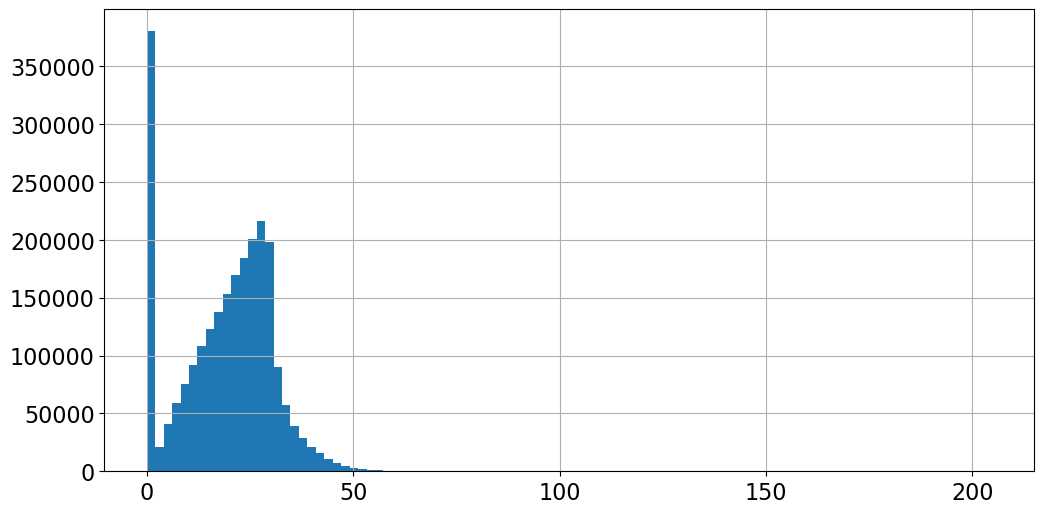

In [93]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 6))
plt.grid()

plt.hist(sp_dist * 3600, bins=100);

In [99]:
superset_t['dist'] = sp_dist * 3600

In [102]:
min_dists = superset_t[['RA', 'DEC', 'dist']].groupby(['RA', 'DEC']).min()['dist']

In [103]:
min_dists

RA          DEC       
0.000187     6.767321      0.173000
0.000215     27.469903     0.017279
0.000279    -2.237564      0.220012
0.000763     28.426617     0.337766
0.000931     27.964822     0.209553
                            ...    
359.998887   31.441902     0.069652
359.998938  -3.556627      0.093488
359.998965   26.546059     0.148604
359.999031   28.234150     0.115336
359.999190   27.772593    10.180487
Name: dist, Length: 459170, dtype: float64

In [110]:
full_t[full_t['SOURCE'] == 'No value']

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q,sdssdr16_u_psf,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
0,171139738,0.000187,6.767321,-0.000685,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1,349500180,0.000215,27.469903,-0.000839,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
2,60588214,0.000279,-2.237564,-0.000058,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
3,405570842,0.000629,35.517841,0.845435,0,b'QSO',b'QSO',True,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
4,357140356,0.000763,28.426617,-0.000611,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227527,342283052,359.998965,26.546059,-0.000418,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227529,355997710,359.999031,28.234150,-0.000430,0,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227531,351857938,359.999190,27.772593,-0.000328,1,b'STAR',b'STAR',False,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1
1227532,401165277,359.999303,34.720842,3.109000,3,b'QSO',b'QSO',True,True,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1


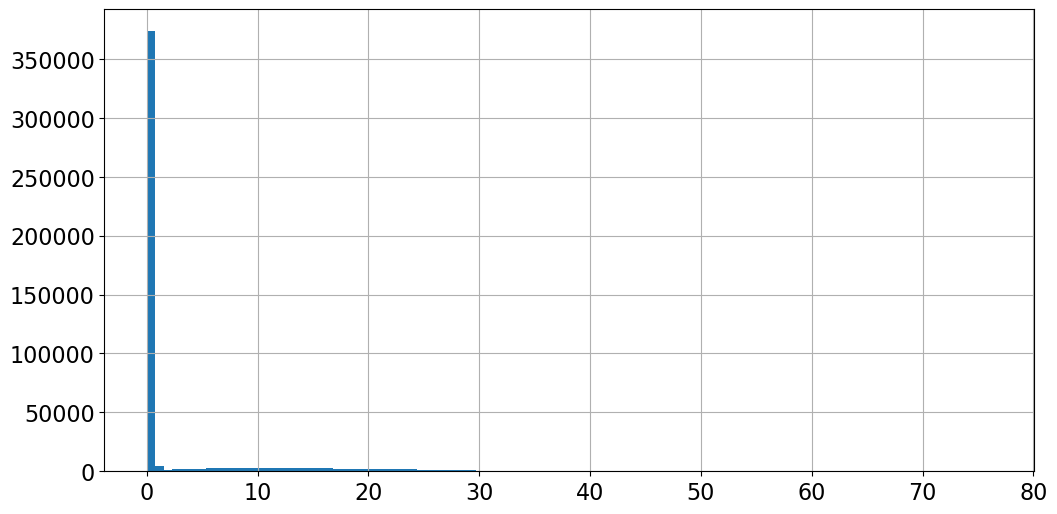

In [104]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 6))
plt.grid()

plt.hist(min_dists, bins=100);

In [106]:
(min_dists < 1).sum()

376492

In [107]:
min_dists.max()

76.28820050182365

In [112]:
superset_t[superset_t['dist'] > 200][['RA', 'DEC', 'ls_ra', 'ls_dec', 'zoo_x135_z_max', 'zoo_x135_z_maxConf']]

,RA,DEC,ls_ra,ls_dec,zoo_x135_z_max,zoo_x135_z_maxConf
265242,116.887268,83.106769,116.830516,83.102931,0.603094,0.088761


In [111]:
full_t[full_t['RA'] == 116.887268]

,SDSS_ID,RA,DEC,Z,CLASS_PERSON,AUTOCLASS_PQN,AUTOCLASS_DR14Q,DR16Q,DR14Q,sdssdr16_u_psf,...,decals8tr_g-r,decals8tr_g-z,decals8tr_r-z,sdssdr16_g_cmodel-decals8tr_g,sdssdr16_r_cmodel-decals8tr_r,sdssdr16_z_cmodel-decals8tr_z,zoo_x1a35_z_max,zoo_x1a35_z_maxConf,SOURCE,index
244420,562636840,116.887268,83.106769,2.7673,0,b'UNK',b'UNK',True,False,No value,...,No value,No value,No value,No value,No value,No value,No value,No value,No value,-1


In [114]:
ra_01 = superset_t['RA'].values * np.pi / 180
ra_02 = superset_t['ls_ra'].values * np.pi / 180
dec_01 = superset_t['DEC'].values * np.pi / 180
dec_02 = superset_t['ls_dec'].values * np.pi / 180

In [142]:
sp_dist_01 = np.arccos(
    np.sin(dec_01) * np.sin(dec_02) +
    np.cos(dec_01) * np.cos(dec_02) * np.cos(ra_01 - ra_02)
) * 180 / (np.pi)

/tmp/ipykernel_1201853/4114138662.py:1: RuntimeWarning: invalid value encountered in arccos
  sp_dist_01 = np.arccos(


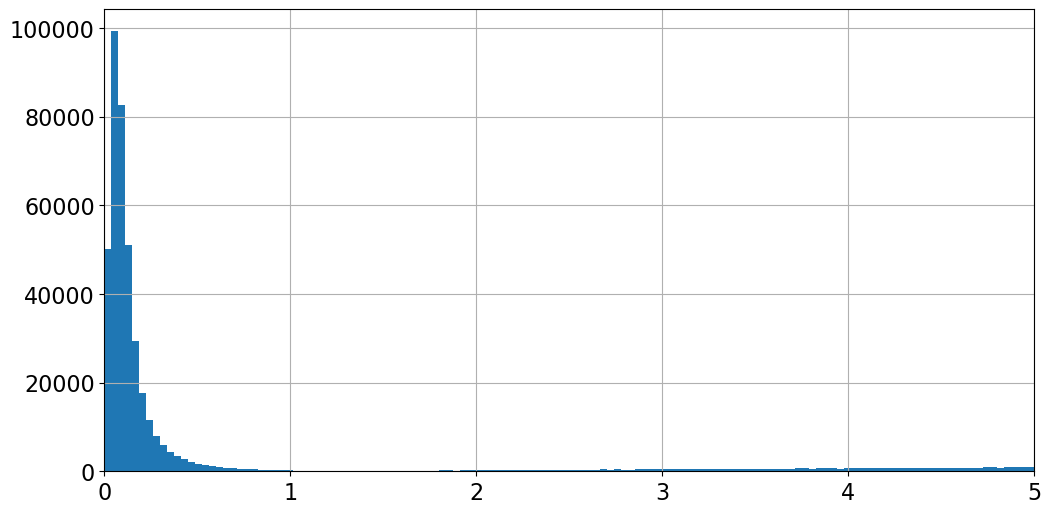

In [151]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 6))
plt.xlim(0, 5)
plt.grid()

plt.hist(sp_dist_01 * 3600, bins=800);

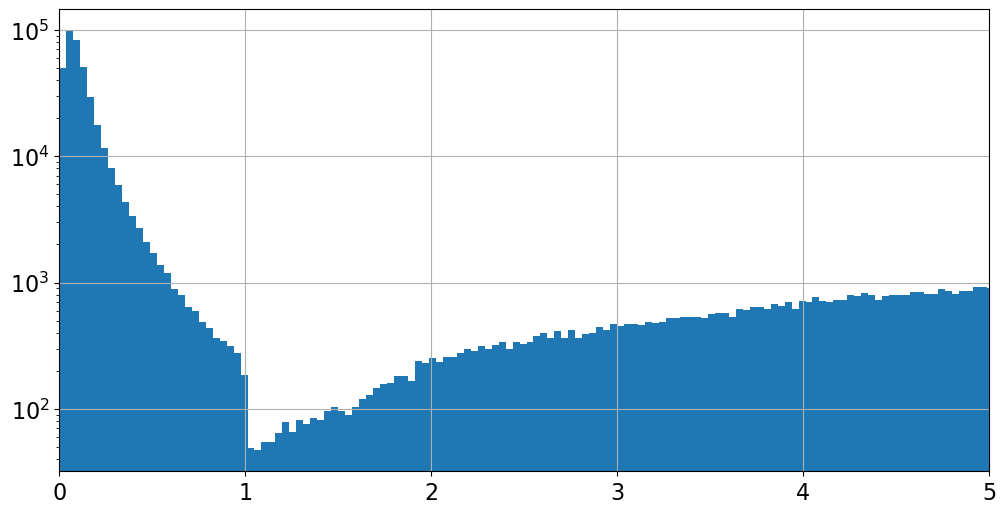

In [157]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(12, 6))
plt.xlim(0, 5)
plt.grid()

plt.hist(sp_dist_01 * 3600, bins=800, log=True);

In [138]:
ra_01.min()

3.2578315817726157e-06

In [139]:
a = np.sin(dec_01) * np.sin(dec_02) + np.cos(dec_01) * np.cos(dec_02) * np.cos(ra_01 - ra_02)

In [140]:
a.min()

0.9999999894230154

In [141]:
np.arccos(a.min())

0.00014544404174888194